# Preliminary Results

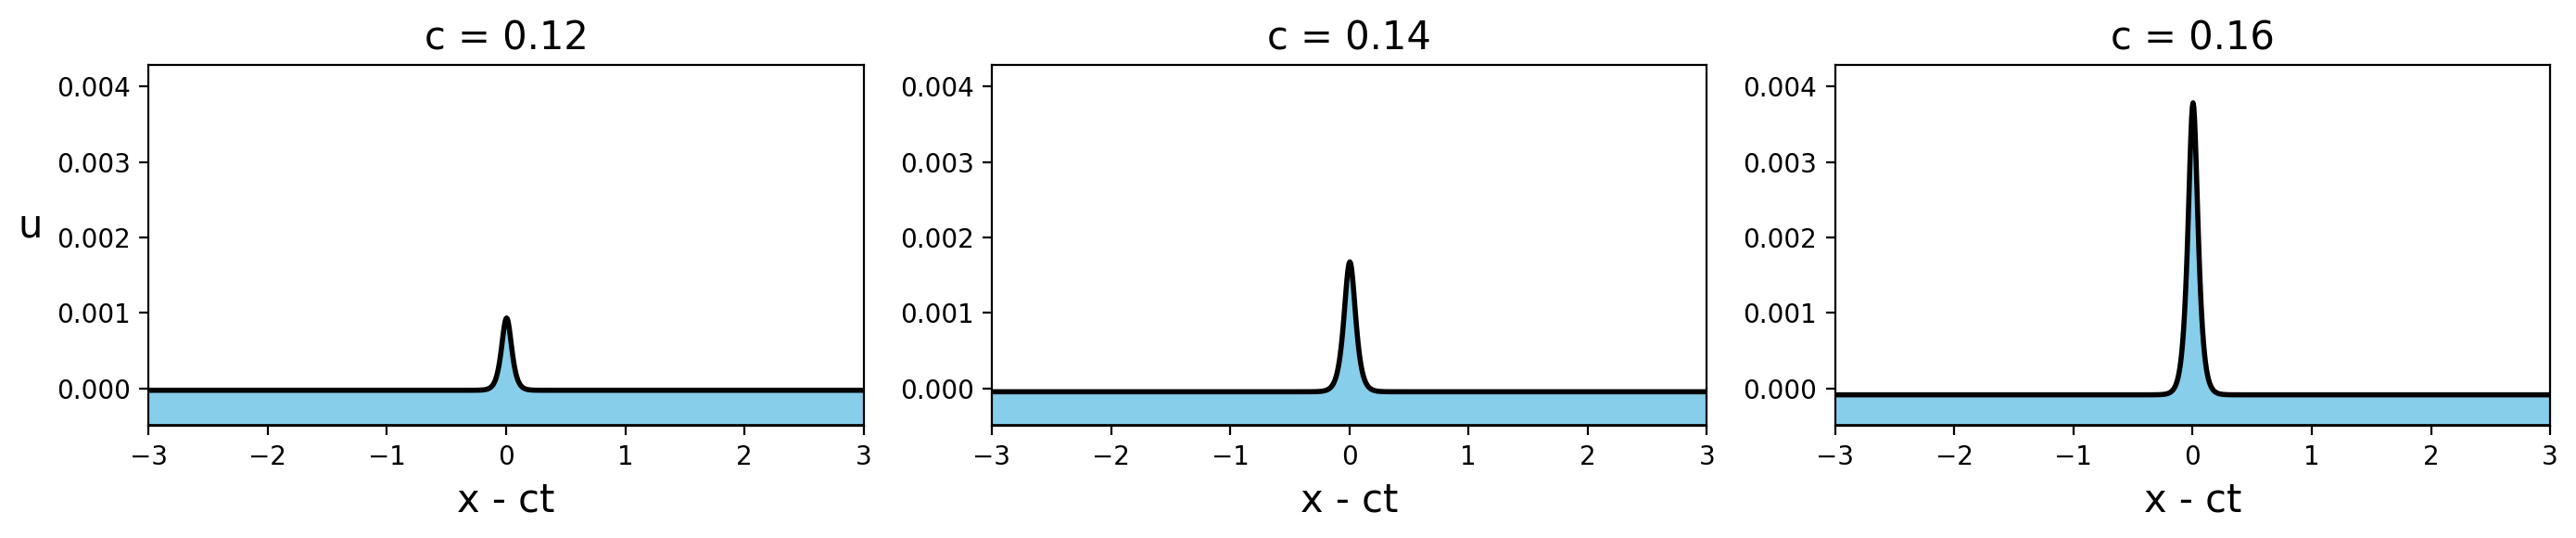

In [1]:
import os
import numpy as np
import pysindy as ps
import matplotlib.pyplot as plt
from pysindy.differentiation import SpectralDerivative

# DEFINE THE DESIRED DIRECTORY OF DATA.
DIRECTORY = "cnoidal_waves_stationary"
filenames = ["HL0.0001524035047093.txt","HL0.0002738341969211.txt","HL0.0006155171680898.txt"]
all_c = [0.12, 0.14, 0.16]

# Set the spectral derivative operations.
sd1 = SpectralDerivative(d=1)
sd2 = SpectralDerivative(d=2)

# Load the data.
all_Y = []
all_u = []
for filename in filenames:
    data = np.loadtxt(f"{DIRECTORY}/{filename}", skiprows=4)
    u, y = data[:, 0], data[:, 2]
    all_Y.append(np.vstack([y, sd1(y,u), sd2(y,u)]).T)
    all_u.append(u)

y2_vals = [-1e-4, -2e-4, -5*1e-4]
plt.figure(figsize=(14, 3), dpi=200)
for i, (Y, u) in enumerate(zip(all_Y, all_u)):
    plt.subplot(1, 3, i + 1)
    plt.title(f"c = {all_c[i]}", fontsize=15)
    plt.fill_between(u, Y[:, 0], y2=y2_vals[-1], ec="k", fc="skyblue", lw=2)
    plt.xlabel("x - ct", fontsize=15)
    plt.xlim([-3, 3])
    plt.ylim([y2_vals[-1], all_Y[-1][:, 0].max()-y2_vals[-1]])
    if i == 0:
        plt.ylabel("u", fontsize=15, rotation=0, labelpad=10.0)
plt.tight_layout()
plt.show()

(u)' = 0.994 u'
(u')' = 0.988 u''
(u'')' = 1021.713 u' + -3612480.532 u u' + 662.365 u' u''


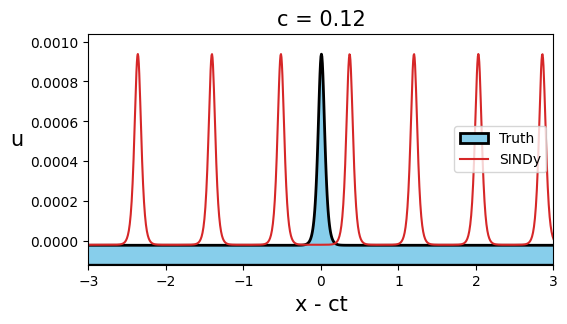

In [2]:
Y = all_Y[0]
u = all_u[0]
c = all_c[0]
model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=0.02, alpha=0.01),
    feature_library=ps.PolynomialLibrary(degree=2),
    feature_names=["u", "u'", "u''"],
)
model.fit(Y, t=u)
model.print()

pad = 1e-4
plt.figure(figsize=(6, 3), dpi=100)
plt.title(f"c = {c}", fontsize=15)
plt.fill_between(
    u, Y[:, 0], y2=-pad+Y[:, 0].min(),
    ec="k", fc="skyblue", lw=2, label="Truth",
)
plt.plot(u, model.simulate(x0=Y[0], t=u)[:, 0], c="tab:red", label="SINDy")
plt.xlabel("x - ct", fontsize=15)
plt.ylabel("u", fontsize=15, rotation=0, labelpad=10.0)
plt.xlim([-3, 3])
plt.ylim([-pad+Y[:, 0].min(), Y[:, 0].max()+pad])
plt.legend(loc="center right")
plt.show()

# Parameter Tuning...

threshold = 0.0001
alpha = 1e-05
(u)' = 1.006 ux + -22.577 u ux + 0.005 ux uxx
(ux)' = 1.727 u + 1.011 uxx + 94628.516 u^2 + 125.627 u uxx + -264.947 ux^2 + 0.017 uxx^2
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


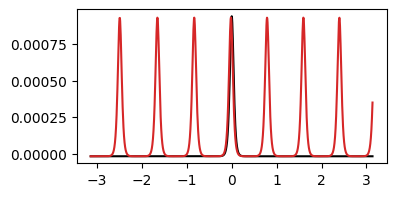

threshold = 0.0001
alpha = 0.0001
(u)' = 1.006 ux + -22.577 u ux + 0.005 ux uxx
(ux)' = 1.727 u + 1.011 uxx + 94628.516 u^2 + 125.627 u uxx + -264.947 ux^2 + 0.017 uxx^2
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


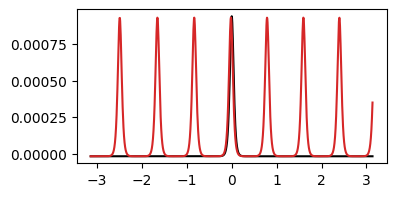

threshold = 0.0001
alpha = 0.001
(u)' = 1.006 ux + -22.577 u ux + 0.005 ux uxx
(ux)' = -0.003 u + 1.006 uxx + -17.878 u uxx + -28.856 ux^2 + 0.012 uxx^2
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


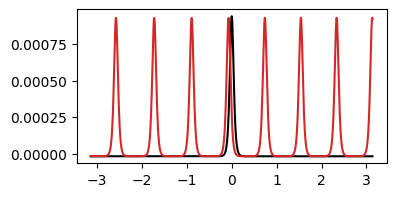

threshold = 0.0001
alpha = 0.01
(u)' = 1.006 ux + -22.577 u ux + 0.005 ux uxx
(ux)' = -0.003 u + 1.006 uxx + -17.878 u uxx + -28.856 ux^2 + 0.012 uxx^2
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


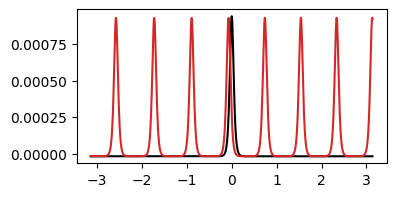

threshold = 0.0001
alpha = 0.1
(u)' = 0.994 ux
(ux)' = -7.340 u + 1.013 uxx + -37.137 u uxx + 0.011 uxx^2
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


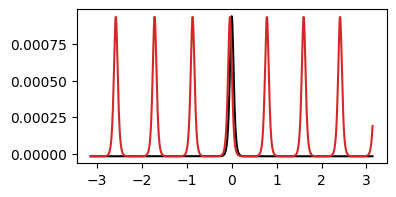

threshold = 0.001
alpha = 1e-05
(u)' = 0.994 ux + 0.026 ux uxx
(ux)' = 1.727 u + 1.011 uxx + 94628.516 u^2 + 125.627 u uxx + -264.947 ux^2 + 0.017 uxx^2
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


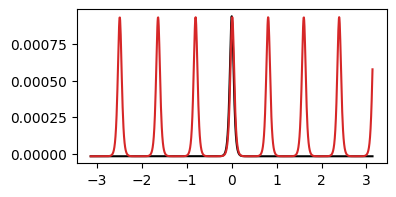

threshold = 0.001
alpha = 0.0001
(u)' = 0.994 ux + 0.026 ux uxx
(ux)' = -0.003 u + 1.006 uxx + -17.878 u uxx + -28.856 ux^2 + 0.012 uxx^2
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


C:\Users\sarai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


Simulation issue. Plotting cancelled.
threshold = 0.001
alpha = 0.001
(u)' = 0.994 ux + 0.026 ux uxx
(ux)' = 1.790 u + 0.999 uxx + -35.402 ux^2 + 0.024 uxx^2
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


C:\Users\sarai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


Simulation issue. Plotting cancelled.
threshold = 0.001
alpha = 0.01
(u)' = 0.994 ux
(ux)' = -6.434 u + 0.996 uxx + 0.038 uxx^2
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


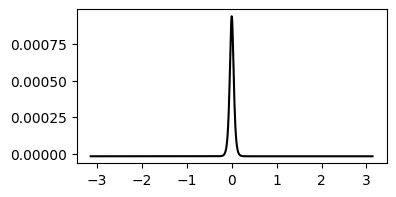

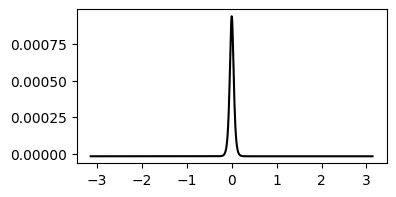

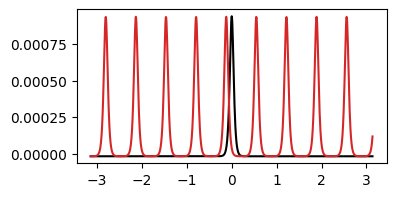

threshold = 0.001
alpha = 0.1
(u)' = 0.994 ux
(ux)' = 0.993 uxx + 0.012 uxx^2
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


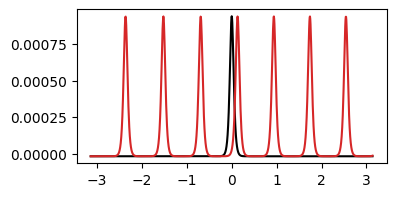

threshold = 0.01
alpha = 1e-05
(u)' = 0.994 ux + 0.026 ux uxx
(ux)' = -0.003 u + 1.006 uxx + -17.878 u uxx + -28.856 ux^2 + 0.012 uxx^2
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


C:\Users\sarai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


Simulation issue. Plotting cancelled.
threshold = 0.01
alpha = 0.0001
(u)' = 0.994 ux + 0.026 ux uxx
(ux)' = 1.790 u + 0.999 uxx + -35.402 ux^2 + 0.024 uxx^2
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


C:\Users\sarai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


Simulation issue. Plotting cancelled.
threshold = 0.01
alpha = 0.001
(u)' = 0.994 ux
(ux)' = -6.434 u + 0.996 uxx + 0.038 uxx^2
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


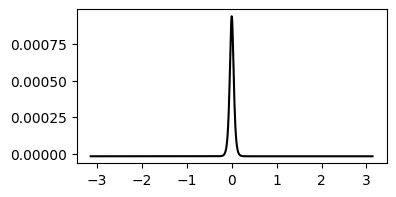

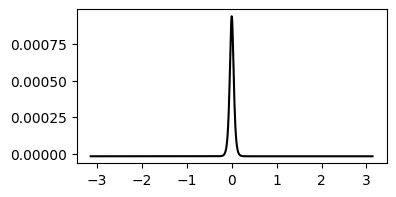

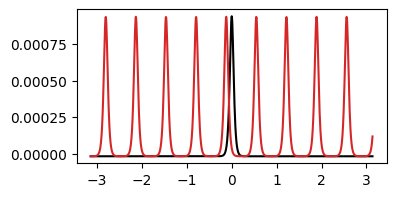

threshold = 0.01
alpha = 0.01
(u)' = 0.994 ux
(ux)' = 0.988 uxx
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


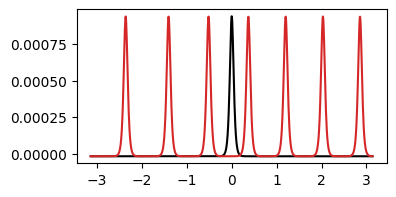

threshold = 0.01
alpha = 0.1
(u)' = 0.994 ux
(ux)' = 0.993 uxx + 0.012 uxx^2
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


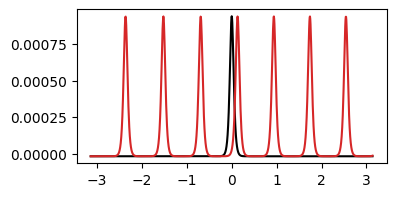

threshold = 0.1
alpha = 1e-05
(u)' = 0.994 ux
(ux)' = 9.318 u + 0.998 uxx + -61.630 ux^2
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


C:\Users\sarai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


Simulation issue. Plotting cancelled.
threshold = 0.1
alpha = 0.0001
(u)' = 0.994 ux
(ux)' = -2.119 u + 0.986 uxx
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


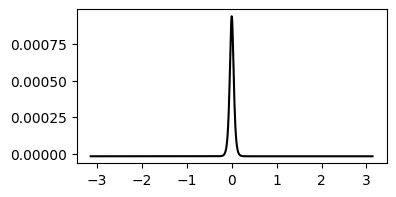

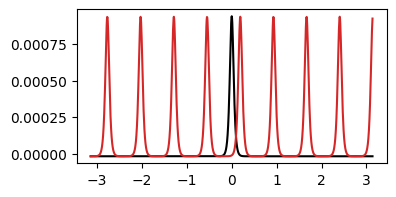

threshold = 0.1
alpha = 0.001
(u)' = 0.994 ux
(ux)' = 0.988 uxx
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


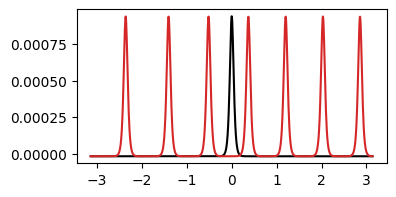

threshold = 0.1
alpha = 0.01
(u)' = 0.994 ux
(ux)' = 0.988 uxx
(uxx)' = 1021.713 ux + -3612480.532 u ux + 662.365 ux uxx


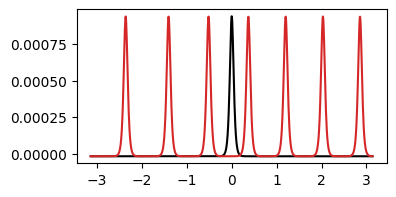

threshold = 0.1
alpha = 0.1
(u)' = 0.000
(ux)' = 0.988 uxx
(uxx)' = -907.756 ux + 3996.524 ux uxx


C:\Users\sarai\AppData\Local\Programs\Python\Python310\lib\site-packages\pysindy\optimizers\stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
C:\Users\sarai\AppData\Local\Programs\Python\Python310\lib\site-packages\pysindy\optimizers\stlsq.py:201: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


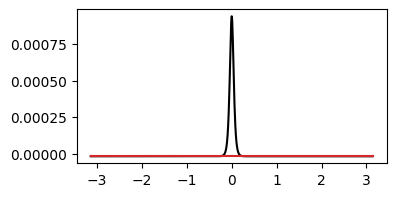

In [3]:
def load_data(directory, d=2):
    all_Y = []
    all_u = []
    for filename in os.listdir(directory):
        data = np.loadtxt(f"{directory}/{filename}", skiprows=4)
        u, y = data[:, 0], data[:, 2]
        all_Y.append(np.vstack([y, sd1(y,u), sd2(y,u)]).T)
        all_u.append(u)
    return all_Y, all_u

def param_sweep(Y, u):
    for thres in [1e-4, 1e-3, 1e-2, 1e-1]:
        for a in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]:
            print(f"threshold = {thres}")
            print(f"alpha = {a}")
            model = ps.SINDy(
                optimizer=ps.STLSQ(threshold=thres, alpha=a),
                feature_library=ps.PolynomialLibrary(degree=2),
                feature_names=["u", "ux", "uxx"],
            )
            model.fit(Y, t=u)
            model.print()
            try:
                plt.figure(figsize=(4, 2))
                plt.plot(u, Y[:, 0], c="k")
                plt.plot(u, model.simulate(x0=Y[0], t=u)[:, 0], c="tab:red")
                plt.show()
            except ValueError:
                print("Simulation issue. Plotting cancelled.")

all_Y, all_u = load_data(DIRECTORY)
param_sweep(all_Y[0], all_u[0])